In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
import numpy as np
import pandas as pd
dat = pd.read_csv('/content/drive/MyDrive/Deep Learning/sample demand forecast.csv')
dat

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52
...,...,...
44995,44995,52
44996,44996,52
44997,44997,52
44998,44998,52


In [ ]:
dat_train = pd.read_csv('/content/drive/MyDrive/Deep Learning/train.csv')
df1 = pd.DataFrame(dat_train)
df1 = df1.drop(['date'],axis=1)
df1

,store,item,sales
0,1,1,13
1,1,1,11
2,1,1,14
3,1,1,13
4,1,1,10
...,...,...,...
912995,10,50,63
912996,10,50,59
912997,10,50,74
912998,10,50,62


In [ ]:
sc.fit(np.reshape(np.array(df1['sales']),(-1,1)))
df1['sales'] = sc.fit_transform(np.reshape(np.array(df1['sales']),(-1,1)))
df1


,store,item,sales
0,1,1,-1.362804
1,1,1,-1.432246
2,1,1,-1.328083
3,1,1,-1.362804
4,1,1,-1.466966
...,...,...,...
912995,10,50,0.373239
912996,10,50,0.234356
912997,10,50,0.755169
912998,10,50,0.338518


In [ ]:
x=1
y=1
while(x!=11):
  y=1
  while(y!=51):
    op = df1.loc[(df1['item']==y) & (df1['store']==x)]
    print(op)
    y=y+1
  x=x+1

Streaming output truncated to the last 5000 lines.

[1826 rows x 3 columns]
        store  item     sales
788832      3    44 -1.154479
788833      3    44 -1.050316
788834      3    44 -1.189200
788835      3    44 -1.119758
788836      3    44 -0.980874
...       ...   ...       ...
790653      3    44 -0.980874
790654      3    44 -0.841991
790655      3    44 -0.633666
790656      3    44 -0.876712
790657      3    44 -0.529503

[1826 rows x 3 columns]
        store  item     sales
807092      3    45  0.164914
807093      3    45 -0.460061
807094      3    45  0.442681
807095      3    45 -0.078132
807096      3    45  0.164914
...       ...   ...       ...
808913      3    45  1.241261
808914      3    45  1.484307
808915      3    45  1.345423
808916      3    45  1.449586
808917      3    45  1.762074

[1826 rows x 3 columns]
        store  item     sales
825352      3    46 -0.668387
825353      3    46 -0.217015
825354      3    46 -0.529503
825355      3    46 -0.703107
8253

In [ ]:
X = []
time = 60
i=1
while(i!=11):
  a = []
  j=1
  while(j!=51):
    k=0
    b = []
    op = np.array(df1.loc[(df1['item']==j) & (df1['store']==i)])
    len = np.shape(op)[0]
    while(k!=len-time):
      c = []
      l=0
      while(l!=time):
        c.append(op[k+l][2])
        l=l+1
      b.append(c)
      k=k+1
    a.append(b)
    j=j+1
  X.append(a)
  i=i+1

np.shape(X)


(10, 50, 1766, 60)

In [ ]:
np.shape(np.array(X[0][0]))[0]

1766

In [ ]:
y = []
time = 60
for i in range(1,11):
  a = []
  for j in range(1,51):
    b = []
    op = np.array(df1.loc[(df1['item']==j) & (df1['store']==i)])
    len = np.shape(op)[0]
    for k in range(0,len-time):
      b.append(op[k+time][2])
    a.append(b)
  y.append(a)

np.shape(y)

(10, 50, 1766)

In [ ]:
print(np.array(y[0][0]))

[-1.36280382 -1.11975778 -1.32808296 ... -1.29336209 -0.87671174
 -1.01559519]


In [ ]:
dat_test = pd.read_csv('/content/drive/MyDrive/Deep Learning/test.csv')
dat_test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [ ]:
model=Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
y_pred = []
for i in range(0,20):
  p = dat_test['store'][i]
  q = dat_test['item'][i]
  X_test = []
  X = np.array(X)
  dom = 1766
  for j in range(1,60):
    X_test.append(X[p-1][q-1][dom-1][j])
  X_test.append(y[p-1][q-1][dom-1])
  temp = np.zeros((1,60,1))
  for j in range(0,60):
    temp[0][j][0] = X_test[j]
  
  model.fit(np.array(X[p-1][q-1]),np.array(y[p-1][q-1]),epochs=1,batch_size=20,verbose=1)
  pred = model.predict(temp)
  pred = sc.inverse_transform(pred)
  y_pred.append(pred)


89/89 [==============================] - 8s 91ms/step - loss: 0.0367


In [ ]:
y_pred

[array([[15.1065035]], dtype=float32),
 array([[15.471871]], dtype=float32),
 array([[18.089783]], dtype=float32),
 array([[18.197113]], dtype=float32),
 array([[17.873169]], dtype=float32),
 array([[15.141686]], dtype=float32),
 array([[15.851731]], dtype=float32),
 array([[16.034111]], dtype=float32),
 array([[15.702184]], dtype=float32),
 array([[17.746956]], dtype=float32),
 array([[15.957532]], dtype=float32),
 array([[16.318058]], dtype=float32),
 array([[16.115444]], dtype=float32),
 array([[14.7519655]], dtype=float32),
 array([[17.839748]], dtype=float32),
 array([[14.365079]], dtype=float32),
 array([[15.383191]], dtype=float32),
 array([[15.890313]], dtype=float32),
 array([[15.6812105]], dtype=float32),
 array([[16.089993]], dtype=float32)]

In [ ]:
k=np.zeros(np.shape(y_pred)[0])
for i in range(0,np.shape(y_pred)[0]):
  k[i]=y_pred[i][0][0]
k

array([15.10650349, 15.47187138, 18.08978271, 18.19711304, 17.87316895,
       15.14168644, 15.8517313 , 16.03411102, 15.70218372, 17.74695587,
       15.95753193, 16.31805801, 16.11544418, 14.75196552, 17.83974838,
       14.36507893, 15.38319111, 15.89031315, 15.68121052, 16.08999252])

In [ ]:
t = dat_train['sales'][0:20]
t

0     13
1     11
2     14
3     13
4     10
5     12
6     10
7      9
8     12
9      9
10     9
11     7
12    10
13    12
14     5
15     7
16    16
17     7
18    18
19    15
Name: sales, dtype: int64

In [ ]:
s=0
for i in range(0,20):
  s = s+(t[i]-k[i])**2
np.sqrt(s)

28.271135483689697

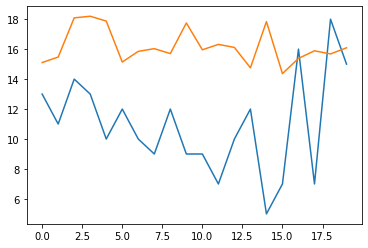

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t)
plt.plot(k)